In [4]:
!pip install --upgrade pip
!pip install --upgrade Pillow

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import torch
import glob
import pandas as pd
import matplotlib.image as mpimg 
from PIL import Image

from torch.utils.data import Dataset
from rasterio.plot import show

In [6]:
def np_points(geo_points, geo_img):
  width, height = geo_img.shape
  left, bottom, right, top = geo_img.bounds

  if geo_img.crs.to_string() != geo_points.crs.to_string():
    geo_points = geo_points.to_crs(geo_img.crs.to_string())
  new_points = geo_points.geometry.translate(xoff=-left, yoff=-bottom, zoff=0.0)

  x_ratio = float(width) / (right - left)
  y_ratio = float(height) / (top - bottom)

  new_points = new_points.affine_transform([x_ratio, 0, 0, -y_ratio, 0, height])
  return np.array([[int(point.x), int(point.y)] for point in new_points.geometry.tolist()])

In [7]:
# ALL
DATA_PATH = 'data'
data_map = []
all_map = []

for tile in glob.glob(f'{DATA_PATH}/Tile *'):
  shape_files = glob.glob(f'{tile}/*.shp')
  if len(shape_files) == 0:
    continue

  for planet_img in glob.glob(f'{tile}/Planet_*_FullScene/*.tif'):
    data_map.extend([planet_img, shape_files[0]])
    all_map.append(planet_img)
  
  for sentinel_img in glob.glob(f'{tile}/Sentinel_*/*.tif'):
    data_map.extend([sentinel_img, shape_files[0]])
    all_map.append(sentinel_img)

# print(data_map[1::2])

df_all = pd.DataFrame({'img_path': data_map[::2], 'shape_path': data_map[1::2]})

In [8]:
display(df_all)

img_path  \
0    data\Tile C4\Planet_C4_FullScene\20170501_1456...   
1    data\Tile C4\Planet_C4_FullScene\20190924_1519...   
2    data\Tile C4\Planet_C4_FullScene\20190925_1436...   
3    data\Tile C4\Planet_C4_FullScene\20191006_1433...   
4    data\Tile C4\Planet_C4_FullScene\20200604_1352...   
..                                                 ...   
160  data\Tile G5\Sentinel_G5\S2B_MSIL1C_20190512T1...   
161  data\Tile G5\Sentinel_G5\S2B_MSIL1C_20200110T1...   
162  data\Tile G5\Sentinel_G5\S2B_MSIL1C_20200728T1...   
163  data\Tile G5\Sentinel_G5\S2B_MSIL1C_20201202T1...   
164  data\Tile G5\Sentinel_G5\S2B_MSIL1C_20210213T1...   

                                  shape_path  
0    data\Tile C4\GTD_Trees_Locations_C4.shp  
1    data\Tile C4\GTD_Trees_Locations_C4.shp  
2    data\Tile C4\GTD_Trees_Locations_C4.shp  
3    data\Tile C4\GTD_Trees_Locations_C4.shp  
4    data\Tile C4\GTD_Trees_Locations_C4.shp  
..                                       ...  
160   data\Tile G5\GTD_Trees_Location_G5.shp  
161   data\Tile G5\GTD_Trees_Location_G5.shp  
162   data\Tile G5\GTD_Trees_Location_G5.shp  
163   data\Tile G5\GTD_Trees_Location_G5.shp  
164   data\Tile G5\GTD_Trees_Location_G5.shp  

[165 rows x 2 columns]

In [9]:
# PLA
DATA_PATH = 'data'
pla_data_map = []
pla_map = []

for tile in glob.glob(f'{DATA_PATH}/Tile *'):
  shape_files = glob.glob(f'{tile}/*.shp')
  if len(shape_files) == 0:
    continue

  for planet_img in glob.glob(f'{tile}/Planet_*_FullScene/*.tif'):
    pla_data_map.extend([planet_img, shape_files[0]])
    pla_map.append(planet_img)
  
#   for sentinel_img in glob.glob(f'{tile}/Sentinel_*/*.tif'):
#     data_map.extend([sentinel_img, shape_files[0]])

# print(data_map[1::2])

df_pla = pd.DataFrame({'img_path': pla_data_map[::2], 'shape_path': pla_data_map[1::2]})

In [10]:
#SEN
DATA_PATH = 'data'
sen_data_map = []
sen_map = []

for tile in glob.glob(f'{DATA_PATH}/Tile *'):
  shape_files = glob.glob(f'{tile}/*.shp')
  if len(shape_files) == 0:
    continue
 
  for sentinel_img in glob.glob(f'{tile}/Sentinel_*/*.tif'):
    sen_data_map.extend([sentinel_img, shape_files[0]])
    sen_map.append(sentinel_img)

# print(data_map[1::2])

df_sen = pd.DataFrame({'img_path': sen_data_map[::2], 'shape_path': sen_data_map[1::2]})

In [11]:
display(df_sen.head())

img_path  \
0  data\Tile C4\Sentinel_C4\S2A_MSIL1C_20170716T1...   
1  data\Tile C4\Sentinel_C4\S2A_MSIL1C_20190924T1...   
2  data\Tile C4\Sentinel_C4\S2A_MSIL1C_20191123T1...   
3  data\Tile C4\Sentinel_C4\S2A_MSIL1C_20210119T1...   
4  data\Tile C4\Sentinel_C4\S2B_MSIL1C_20190512T1...   

                                shape_path  
0  data\Tile C4\GTD_Trees_Locations_C4.shp  
1  data\Tile C4\GTD_Trees_Locations_C4.shp  
2  data\Tile C4\GTD_Trees_Locations_C4.shp  
3  data\Tile C4\GTD_Trees_Locations_C4.shp  
4  data\Tile C4\GTD_Trees_Locations_C4.shp

In [12]:
df_pla.head()

img_path  \
0  data\Tile C4\Planet_C4_FullScene\20170501_1456...   
1  data\Tile C4\Planet_C4_FullScene\20190924_1519...   
2  data\Tile C4\Planet_C4_FullScene\20190925_1436...   
3  data\Tile C4\Planet_C4_FullScene\20191006_1433...   
4  data\Tile C4\Planet_C4_FullScene\20200604_1352...   

                                shape_path  
0  data\Tile C4\GTD_Trees_Locations_C4.shp  
1  data\Tile C4\GTD_Trees_Locations_C4.shp  
2  data\Tile C4\GTD_Trees_Locations_C4.shp  
3  data\Tile C4\GTD_Trees_Locations_C4.shp  
4  data\Tile C4\GTD_Trees_Locations_C4.shp

In [13]:
display(df_pla[['shape_path']])

shape_path
0   data\Tile C4\GTD_Trees_Locations_C4.shp
1   data\Tile C4\GTD_Trees_Locations_C4.shp
2   data\Tile C4\GTD_Trees_Locations_C4.shp
3   data\Tile C4\GTD_Trees_Locations_C4.shp
4   data\Tile C4\GTD_Trees_Locations_C4.shp
..                                      ...
92   data\Tile G5\GTD_Trees_Location_G5.shp
93   data\Tile G5\GTD_Trees_Location_G5.shp
94   data\Tile G5\GTD_Trees_Location_G5.shp
95   data\Tile G5\GTD_Trees_Location_G5.shp
96   data\Tile G5\GTD_Trees_Location_G5.shp

[97 rows x 1 columns]

In [14]:
RADIUS = 5
# dummy function
def create_circular_mask(radius=5):
  center = (radius, radius)
  Y, X = np.ogrid[:radius*2 + 1, :radius*2 + 1]
  dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

  mask = np.zeros((2*radius + 1, 2*radius + 1))
  mask[dist_from_center <= radius] = 1
  return mask

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


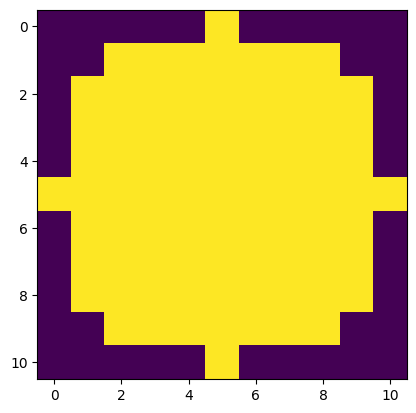

In [15]:
circle = create_circular_mask(RADIUS)
print(circle)
plt.imshow(circle)

In [16]:
RADIUS = 5 # unit? 

def create_mask(geo_points, geo_img):
    
    points = np_points(geo_points, geo_img).tolist()
    mask = np.zeros(geo_img.shape)
    #print(points)
    #print(mask)
    #print(mask.shape)
    XLESS = 0
    YLESS = 0
    counter = 0
    for x, y in points:
        #print(RADIUS)
        # print("in the for: ", mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape)
        # print("before", circle)
        
        # row cutoff edge case / 2nd x val too large => 1st x val needs to be handled?
        #if mask[x - RADIUS : x + RADIUS + 1] > circle[]
        if ((y + RADIUS + 1) - 1668) > 0 : # row cutoff edge case /
            mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle[:-((y + RADIUS + 1) - 1668), :]
            #print("rad 2", (y + RADIUS + 1))
        elif ((x + RADIUS + 1) - 1668) > 0 : #col cutoff case (2nd val). Greater than 1668 size of image
            mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle[:, :-((x + RADIUS + 1)- 1668)]
            # print(x + RADIUS + 1)
        
        elif (y - RADIUS) < 0:
            mask[0: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle[0: y+RADIUS+1, :] #cut off circle
        
        elif (x - RADIUS) < 0:
            mask[y - RADIUS: y + RADIUS + 1, 0: x + RADIUS + 1] = circle[:, 0:x+RADIUS+1]
        elif ((y + RADIUS + 1) - 1668) <= 0:
            print(mask.shape)
            # mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle
            print("in the for. mask.shape: ", mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape) #7,11
            print("before circle", circle) # 11,11
            print("((y + RADIUS + 1) - 1668) = ", ((y + RADIUS + 1) - 1668))
            print("normal y", y - RADIUS, y + RADIUS + 1)
            print( "normal x", x - RADIUS, x + RADIUS + 1)
            # mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle
            # ? - x y ordering
            #if ()
            try:
                mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1] = circle
            except Exception:
                counter =+1
                print("ERROR")
                print(" in the TRY. mask.shape: ", mask[y - RADIUS: y + RADIUS + 1, x - RADIUS : x + RADIUS + 1].shape)
        #print("circle", circle)
        #print(XLESS)

    # f, ax = plt.subplots(figsize=(40, 10))
    # plt.imshow(mask)
    # print('count', counter)
    return mask

In [18]:
ALL_PATH = 'data\\uncut_tif_masks_all_edges_not_caught\\'
def generate_all():
    counter = 0
    for idx in df_all.index:
        # print(idx)
        tiff_name = all_map[idx]
        print(tiff_name)
        # print("split", tiff_name.split('\\')[-1])

        mask_save_name = tiff_name.split('\\')[-1] #.replace('.tif', '.png')
        # print(mask_save_name)
        # break
        geo_img = rasterio.open(df_all.iloc[idx, 0]) #loop thru length of dataframe instead and pass idx 
    
        # print(geo_img)
        image = geo_img.read()

        geo_points = gpd.read_file(df_all.iloc[idx, 1])
        # print(geo_points)
        mask = create_mask(geo_points, geo_img)
        #counter =+ s
        mask = Image.fromarray(mask*255) # for visualization
        # print(PNG_PATH + png_save_name) #For model - imread slice last channel
        mask = mask.convert('RGB')
        mask.save(ALL_PATH + mask_save_name)
    # print('COUNTER', counter)
#     return image, mask

# generate_sen() # ?!??!?!
generate_all()

data\Tile C4\Planet_C4_FullScene\20170501_145608-07_Mosaic_Clip.tif
(1668, 1668)
in the for. mask.shape:  (11, 11)
before circle [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
((y + RADIUS + 1) - 1668) =  -95
normal y 1562 1573
normal x 335 346
(1668, 1668)
in the for. mask.shape:  (11, 11)
before circle [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 

In [ ]:
TIF_PATH = 'data\\uncut_tif_masks_pla\\'
def generate_pla():
    
    for idx in df_pla.index:
        print(idx)
        tiff_name = pla_map[idx]
        # print(tiff_name)
        print("split", tiff_name.split('\\')[-1])

        mask_save_name = tiff_name.split('\\')[-1] #.replace('.tif', '.png')
        print(mask_save_name)
        # break
        geo_img = rasterio.open(df_pla.iloc[idx, 0]) #loop thru length of dataframe instead and pass idx 
    
        print(geo_img)
        image = geo_img.read()

        geo_points = gpd.read_file(df_pla.iloc[idx, 1])
        print(geo_points)
        mask = create_mask(geo_points, geo_img)
        
        mask = Image.fromarray(mask*255) # for visualization
        # print(PNG_PATH + png_save_name) #For model - imread slice last channel
        mask = mask.convert('RGB')
        mask.save(TIF_PATH + mask_save_name)

#     return image, mask

generate_pla() # ? - why are only 83 returned?!??!?!

0
split 20170501_145608-07_Mosaic_Clip.tif
20170501_145608-07_Mosaic_Clip.tif
<open DatasetReader name='data\Tile C4\Planet_C4_FullScene\20170501_145608-07_Mosaic_Clip.tif' mode='r'>
   OBJECTID_1  OBJECTID  Note   ID       Lat        Lon  Site  \
0           1       174  None  163  7.858533 -77.865093  None   
1           2       175  None  164  7.858077 -77.869946  None   

                        geometry  
0  POINT (184033.554 869739.383)  
1  POINT (183497.639 869692.519)  
(1668, 1668)
in the for. mask.shape:  (11, 11)
before circle [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
((y + RADIUS + 1) - 1668) =  -95
normal y 1562 1573
normal

In [ ]:
SEN_PATH = 'data\\uncut_tif_masks_sen\\'
def generate_sen():
    
    for idx in df_sen.index:
        # print(idx)
        tiff_name = sen_map[idx]
        # print(tiff_name)
        # print("split", tiff_name.split('\\')[-1])

        mask_save_name = tiff_name.split('\\')[-1] #.replace('.tif', '.png')
        # print(mask_save_name)
        # break
        geo_img = rasterio.open(df_sen.iloc[idx, 0]) #loop thru length of dataframe instead and pass idx 
    
        # print(geo_img)
        image = geo_img.read()

        geo_points = gpd.read_file(df_sen.iloc[idx, 1])
        # print(geo_points)
        mask = create_mask(geo_points, geo_img)
        
        mask = Image.fromarray(mask*255) # for visualization
        # print(PNG_PATH + png_save_name) #For model - imread slice last channel
        mask = mask.convert('RGB')
        mask.save(SEN_PATH + mask_save_name)
#     return image, mask

# generate_sen() # ?!??!?!